In [122]:
import numpy as nmp
import scipy as scp
import pandas
import scipy.stats as sts
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

# загружаем данные
iris = load_iris()
iris_target = iris['target']
iris_data = iris['data']
size = 150

# индексы разделения выборки
_id = [50, 100, 150]

_iris_data = [iris_data[:50], iris_data[50:100], iris_data[100:150]]
size = [len(_iris_data[0]), len(_iris_data[1]), len(iris_data[2])]

# раcчет среднего a для каждого из признаков
# дальше буду пользоваться встроенной функцией mean - значение такое же
a = [0, 0, 0]
print('Estimation: a_0, a_1, a_2:')
for x in range(3):
    a[x] = [_iris_data[x][0].sum() / size[x], _iris_data[x][1].sum() / size[x],
       _iris_data[x][2].sum() / size[x], _iris_data[x][3].sum() / size[x]]
    _sum = 0
    for i in range(4):
        _sum = a[x][i]
    _sum = _sum / 4
    print(_sum)
print()

# расчет средней сигмы для каждого из признаков
X_0 = [[0.0] * 4] * size[0]

# расчет новой усредненной матрицы
X = [X_0, X_0, X_0]
for x in range(3):
    for i in range(4):
        _sum = 0
        for j in range(size[0]):
            _sum = _sum + _iris_data[0][j][i]
            v = _iris_data[0][j][i]
            s = _sum / (j + 1)
            X[x][j][i] = v - s

# расчет самих оценок
sigma_0 = [[0.0] * 3] * 3
sigma = [sigma_0, sigma_0, sigma_0]

print('Estimation: sigma_0, sigma_1, sigma_2:')
for x in range(3):
    X[x] = scp.matrix(X[x])
    Y = X[x].transpose()
    sigma[x] = Y * X[x] / size[x]
    sigma[x] = sigma[x].tolist()
    print(nmp.array(sigma[x]))
    print()

Estimation: a_0, a_1, a_2:
0.047
0.0655
1.0375

Estimation: sigma_0, sigma_1, sigma_2:
[[  3.60000000e-05   7.08000000e-04   3.84000000e-04   2.64000000e-04]
 [  7.08000000e-04   1.39240000e-02   7.55200000e-03   5.19200000e-03]
 [  3.84000000e-04   7.55200000e-03   4.09600000e-03   2.81600000e-03]
 [  2.64000000e-04   5.19200000e-03   2.81600000e-03   1.93600000e-03]]

[[  3.60000000e-05   7.08000000e-04   3.84000000e-04   2.64000000e-04]
 [  7.08000000e-04   1.39240000e-02   7.55200000e-03   5.19200000e-03]
 [  3.84000000e-04   7.55200000e-03   4.09600000e-03   2.81600000e-03]
 [  2.64000000e-04   5.19200000e-03   2.81600000e-03   1.93600000e-03]]

[[ 0.00045  0.00885  0.0048   0.0033 ]
 [ 0.00885  0.17405  0.0944   0.0649 ]
 [ 0.0048   0.0944   0.0512   0.0352 ]
 [ 0.0033   0.0649   0.0352   0.0242 ]]



ok


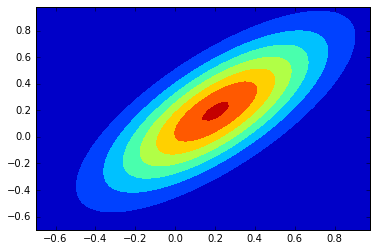

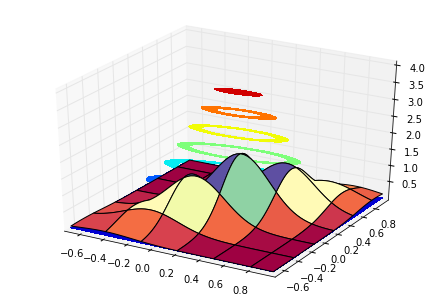

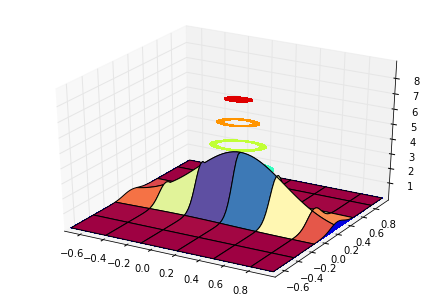

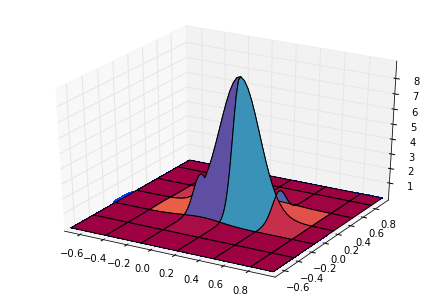

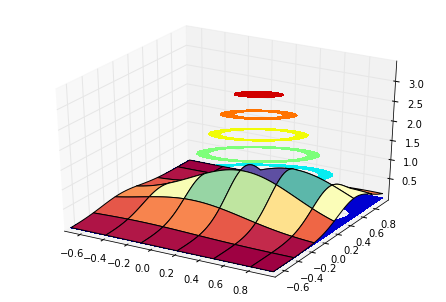

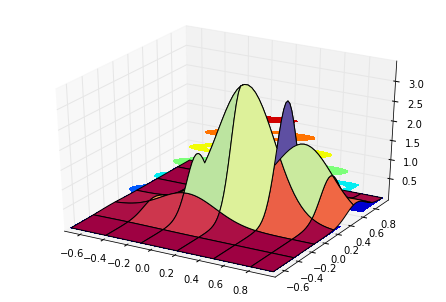

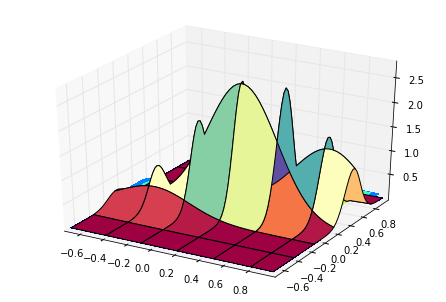

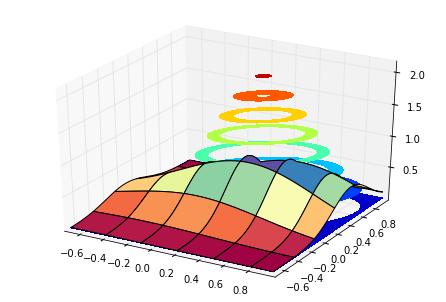

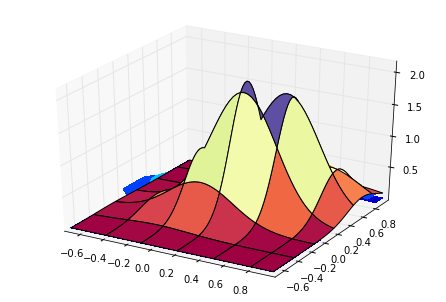

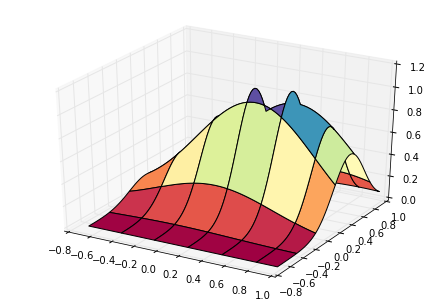

In [154]:
import numpy as nmp
import scipy as scp
import pandas
import scipy.stats as sts
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

# загружаем данные
iris = load_iris()
iris_target = iris['target']
iris_data = iris['data']
size = 150

# индексы разделения выборки
id_0 = 50
id_1 = 100
id_2 = 150

iris_data_0 = iris_data[:50] # 0-49
iris_data_1 = iris_data[50:100] # 50-99
iris_data_2 = iris_data[100:150] # 100-149

size_0 = len(iris_data_0)
size_1 = len(iris_data_1)
size_2 = len(iris_data_2)

# рачет среднего для a для каждого из параметров
a_0 = [iris_data_0[0].sum() / size_0, iris_data_0[1].sum() / size_0,
       iris_data_0[2].sum() / size_0, iris_data_0[3].sum() / size_0]
a_1 = [iris_data_1[0].sum() / size_1, iris_data_1[1].sum() / size_1,
       iris_data_1[2].sum() / size_1, iris_data_1[3].sum() / size_1]
a_2 = [iris_data_2[0].sum() / size_2, iris_data_2[1].sum() / size_2,
       iris_data_2[2].sum() / size_2, iris_data_2[3].sum() / size_2]

# чтобы было удобнее работать со столбцами и пользоваться функциями DataFrame
iris_data_0 = pandas.DataFrame(iris_data_0, columns = ['0', '1', '2', '3'])
iris_data_1 = pandas.DataFrame(iris_data_1, columns = ['0', '1', '2', '3'])
iris_data_2 = pandas.DataFrame(iris_data_2, columns = ['0', '1', '2', '3'])

# расчет средней дисперсии для каждого из параметров
sigma_0 = nmp.array(iris_data_0.cov())
sigma_1 = nmp.array(iris_data_1.cov())
sigma_2 = nmp.array(iris_data_2.cov())

# разобьем на парамеры для каждой из трех пар
a_0_1 = [a_0[0], a_0[1]]
a_0_2 = [a_0[1], a_0[3]]
a_0_3 = [a_0[2], a_0[3]]

a_1_1 = [a_1[0], a_1[1]]
a_1_2 = [a_1[1], a_1[3]]
a_1_3 = [a_1[2], a_1[3]]

a_2_1 = [a_2[0], a_2[1]]
a_2_2 = [a_2[1], a_2[3]]
a_2_3 = [a_2[2], a_2[3]]

sigma_0_1 = [[sigma_0[0][0], sigma_0[0][1]],[sigma_0[1][0], sigma_0[1][1]]]
sigma_0_2 = [[sigma_0[1][1], sigma_0[1][3]],[sigma_0[3][1], sigma_0[3][3]]]
sigma_0_3 = [[sigma_0[2][2], sigma_0[2][3]],[sigma_0[3][2], sigma_0[3][3]]]

sigma_1_1 = [[sigma_1[0][0], sigma_1[0][1]],[sigma_1[1][0], sigma_1[1][1]]]
sigma_1_2 = [[sigma_1[1][1], sigma_1[1][3]],[sigma_1[3][1], sigma_1[3][3]]]
sigma_1_3 = [[sigma_1[2][2], sigma_1[2][3]],[sigma_1[3][2], sigma_1[3][3]]]

sigma_2_1 = [[sigma_2[0][0], sigma_2[0][1]],[sigma_2[1][0], sigma_2[1][1]]]
sigma_2_2 = [[sigma_2[1][1], sigma_2[1][3]],[sigma_2[3][1], sigma_2[3][3]]]
sigma_2_3 = [[sigma_2[2][2], sigma_2[2][3]],[sigma_2[3][2], sigma_2[3][3]]]

# параметры графиков
def line_options(a, sigma):
    # параметры 3D-графика
    x, y = nmp.mgrid[-0.7:1:.03, -0.7:1:.03]
    pos = nmp.empty(x.shape + (2,)) 
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    
    rv = sts.multivariate_normal(mean=a, cov=sigma)
    plt.contourf(x, y, rv.pdf(pos))
    fig = plt.figure()
    axes = Axes3D(fig)
    axes.plot_surface(x, y, rv.pdf(pos), cmap=plt.cm.Spectral)

# выводы графиков
line_options(a_0_1, sigma_0_1)
line_options(a_0_2, sigma_0_2)
line_options(a_0_3, sigma_0_3)

line_options(a_1_1, sigma_1_1)
line_options(a_1_2, sigma_1_2)
line_options(a_1_3, sigma_1_3)

line_options(a_2_1, sigma_2_1)
line_options(a_2_2, sigma_2_2)
line_options(a_2_3, sigma_2_3)


In [160]:
# найдем условные математические ожидания

# снова чуть-чуть отформатируем данные
data = load_iris()
iris = [[], [], []]
for i in range(len(data.target)):
    iris[data.target[i]].append(data.data[i])
iris = nmp.array(iris)

exp = [nmp.array([nmp.array(nmp.array(iris[i])[:,j]).mean() for j in (0, 1, 2, 3)]) for i in (0, 1, 2)]
exp_cond = [(exp[1] + exp[2]) / 2, (exp[0] + exp[2]) / 2, (exp[0] + exp[1]) / 2]

print('E(X|T != 0) = ', exp_cond[0])
print('E(X|T != 1) = ', exp_cond[1])
print('E(X|T != 2) = ', exp_cond[2])

E(X|T != 0) =  [ 6.262  2.872  4.906  1.676]
E(X|T != 1) =  [ 5.797  3.196  3.508  1.135]
E(X|T != 2) =  [ 5.471  3.094  2.862  0.785]
